In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pylab as plt

In [106]:
def itermap(func, dim , n_iter):
    image = np.empty([dim,dim, 3], dtype=np.uint8) 
    image.fill(255)
    for x in range(dim):
        for y in range(dim):
            point = (x + y*1j)/dim
            for i in range(n_iter):
                point = func(point)
            if np.abs(point) > 2:
                break
            else:
                image[x][y] = (0,0,0)
            
    plt.imshow(image)
    return image

In [112]:
def Julia(point):
    return point*point - 0.2+0.75*1j


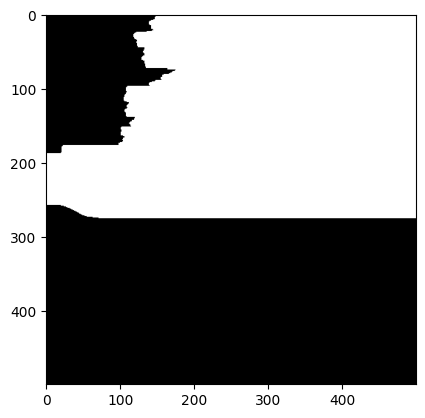

In [113]:
image = itermap(Julia ,500,17)
# cv.imwrite('C:/Users/user/Desktop/Programming/thunderstormxx/' '.jpeg', image)

In [114]:
w =1920 
h = 1080
image = np.empty([w,h, 3], dtype=np.uint8) 
image.fill(255)
cX, cY = -0.7, 0.27015
moveX, moveY = 0.0, 0.0
maxIter = 255

for x in range(w):
    for y in range(h):
        zx = 1.5*(x - w/2)/(0.5*w) + moveX
        zy = 1.0*(y - h/2)/(0.5*h) + moveY
        i = maxIter
        while zx*zx + zy*zy < 4 and i > 1:
            tmp = zx*zx - zy*zy + cX
            zy,zx = 2.0*zx*zy + cY, tmp
            i -= 1
        image[x,y] = (i << 21) + (i << 10) + i*8
plt.imshow(image)

KeyboardInterrupt: 